# Import libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import json

## Bring the dataset from the database

In [123]:
with open('passwords.json', 'r') as file:
    config = json.load(file)

user = config['Proyect']['user']
password = config['Proyect']['password']
host = config['Proyect']['host']
port = config['Proyect']['port']
database_name = config['Proyect']['db_name']
database_table = config['Proyect']['db_table']

In [124]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database_name}')

sql = f'SELECT * FROM "{database_table}"'

df = pd.read_sql_query(sql, engine)
df.head()

,Title,Release Day,Release Month,Release Year,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2.0,17.0,2012.0,Action Button Entertainment,Freshuu Inc.,Action,None,69.0,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11.0,15.0,2001.0,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1.0,22.0,2002.0,Namco,Namco,Auto Racing Sim,Rated E For Everyone,58.0,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11.0,14.0,2006.0,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,75.0,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5.0,18.0,2021.0,FishTankStudio,Black Eye Games,RPG,None,65.0,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


# Description

In [125]:
df.describe()

,Release Day,Release Month,Release Year,User Score,User Ratings Count
count,41973.000000,41973.000000,41973.000000,35142.000000,33897.000000
mean,6.899078,16.493389,2011.727539,61.784019,245.642977
std,3.369437,8.658360,6.531504,23.939784,1847.840836
min,1.000000,1.000000,1995.000000,1.000000,5.000000
25%,4.000000,9.000000,2007.000000,56.000000,14.000000
50%,7.000000,17.000000,2012.000000,69.000000,34.000000
75%,10.000000,24.000000,2017.000000,78.000000,111.000000
max,12.000000,31.000000,2024.000000,98.000000,163419.000000


# Data type

In [126]:
df.dtypes

Title                  object
Release Day           float64
Release Month         float64
Release Year          float64
Developer              object
Publisher              object
Genres                 object
Product Rating         object
User Score            float64
User Ratings Count    float64
Platforms Info         object
dtype: object

# General information of the data

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42165 entries, 0 to 42164
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               42102 non-null  object 
 1   Release Day         41973 non-null  float64
 2   Release Month       41973 non-null  float64
 3   Release Year        41973 non-null  float64
 4   Developer           41751 non-null  object 
 5   Publisher           41751 non-null  object 
 6   Genres              42102 non-null  object 
 7   Product Rating      33015 non-null  object 
 8   User Score          35142 non-null  float64
 9   User Ratings Count  33897 non-null  float64
 10  Platforms Info      42165 non-null  object 
dtypes: float64(5), object(6)
memory usage: 3.5+ MB


# Convert data

In [128]:
df1 = df.convert_dtypes() 
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42165 entries, 0 to 42164
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               42102 non-null  string
 1   Release Day         41973 non-null  Int64 
 2   Release Month       41973 non-null  Int64 
 3   Release Year        41973 non-null  Int64 
 4   Developer           41751 non-null  string
 5   Publisher           41751 non-null  string
 6   Genres              42102 non-null  string
 7   Product Rating      33015 non-null  string
 8   User Score          35142 non-null  Int64 
 9   User Ratings Count  33897 non-null  Int64 
 10  Platforms Info      42165 non-null  string
dtypes: Int64(5), string(6)
memory usage: 3.7 MB


# Number of rows and columns

In [129]:
print(df.shape)
print(type(df.shape)) #Returns a tuple of the form: ("number of rows", "number of columns")

(42165, 11)
<class 'tuple'>


In [130]:

num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

print(f"Type: {type(df.shape)}")


Number of rows: 42165
Number of columns: 11
Type: <class 'tuple'>


# Unique values

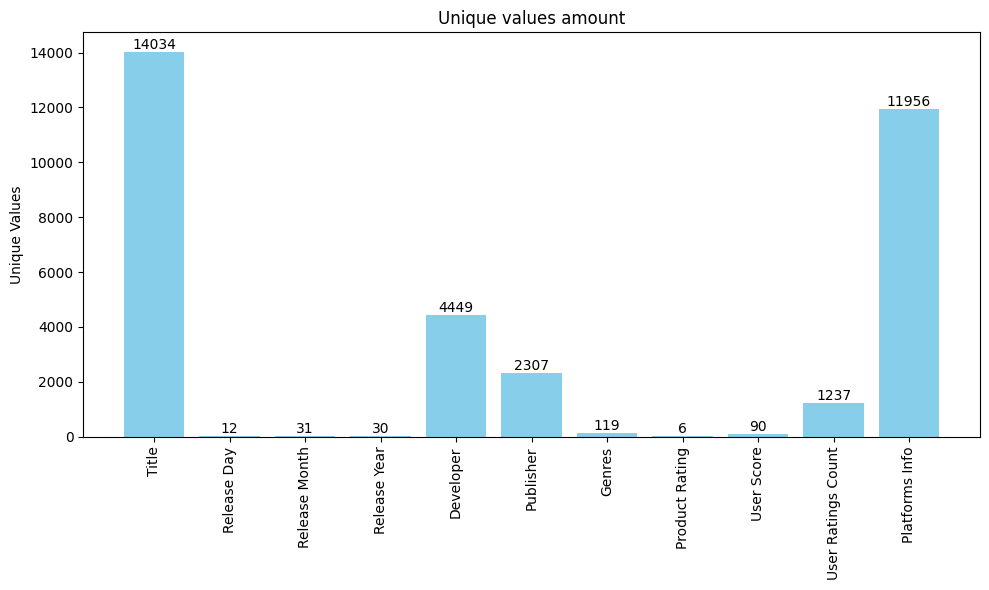

In [134]:
unique_amount = df.nunique()

plt.figure(figsize=(10, 6))

bars = plt.bar(unique_amount.index, unique_amount.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.ylabel('Unique Values')
plt.title('Unique values amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Null values

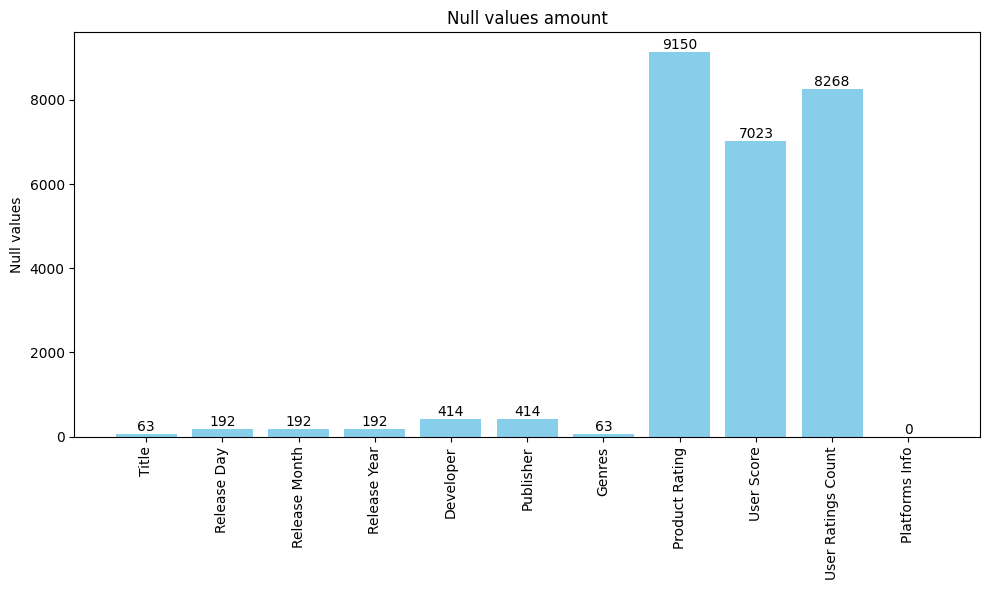

In [137]:
null_report = df.isnull().sum()
plt.figure(figsize=(10, 6))

bars = plt.bar(null_report.index, null_report.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.ylabel('Null values')
plt.title('Null values amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Duplicate values

In [133]:
duplicated_values = {}

for column in df.columns:
    amount_duplicated = df[column].duplicated().sum()
    duplicated_values[column] = amount_duplicated

print("Duplicated Values:")
for column, amount in duplicated_values.items():
    print(f"Column {column} : {amount}")

Duplicated Values:
Column Title : 28130
Column Release Day : 42152
Column Release Month : 42133
Column Release Year : 42134
Column Developer : 37715
Column Publisher : 39857
Column Genres : 42045
Column Product Rating : 42158
Column User Score : 42074
Column User Ratings Count : 40927
Column Platforms Info : 30209


# Graphics